In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(0.3 * x[0]) + np.cos(0.3 * x[1])
def ff(x1, x2):
    return f([x1, x2])

In [3]:
sample_num = 40
np.random.seed(42)
x_train = np.random.randint(0., 20., size=(sample_num, 2))
eps_train = np.random.normal(0., 1.4, size=(sample_num, 1))

In [4]:
y_train = np.zeros((sample_num, 1))
for i in range(sample_num):
    y_train[i] = max(0, f(x_train[i]) + eps_train[i])

In [5]:
x_test1, x_test2 = np.meshgrid(np.arange(0., 20., 1), np.arange(0., 20., 1))

In [6]:
x_test3 = [x for x in zip(x_test1.flatten(), x_test2.flatten())]

In [7]:
y_true = ff(x_test1, x_test2)

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel

In [9]:
regr = GaussianProcessRegressor(
    kernel=ConstantKernel() * RBF() + WhiteKernel(),  # カーネルの演算については後述
    alpha=0.,  # 雑音項はカーネルの中で表現しているので 0. を指定
    # optimizer=None,
)
regr.fit(x_train, y_train)
regr.kernel_  # 推定されたカーネルと誤差項のパラメータを確認

0.918**2 * RBF(length_scale=6.06) + WhiteKernel(noise_level=0.834)

In [10]:
y_pred, y_std = regr.predict(x_test3, return_std=True)  # y*の平均と標準偏差を計算

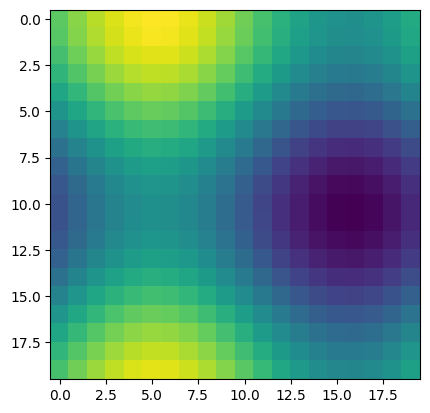

In [11]:
plt.imshow(y_true)

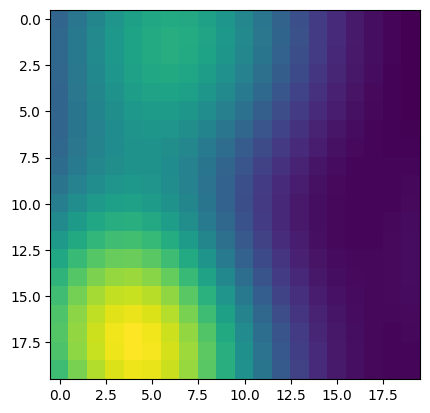

In [12]:
plt.imshow(y_pred.reshape(20, 20))

(0.0, 20.0, 0.0, 20.0)

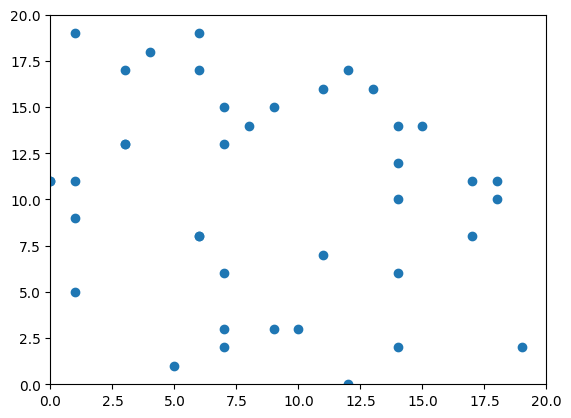

In [13]:
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.axis([0, 20, 0, 20])

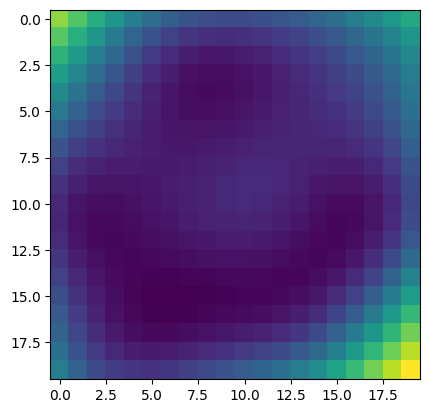

In [14]:
plt.imshow(y_std.reshape(20, 20))

In [15]:
y_true[0, :]

array([1.        , 1.29552021, 1.56464247, 1.78332691, 1.93203909,
       1.99749499, 1.97384763, 1.86320937, 1.67546318, 1.42737988,
       1.14112001, 0.84225431, 0.55747956, 0.31223384, 0.12842423,
       0.02246988, 0.00383539, 0.07418532, 0.22723551, 0.44931446])

In [16]:
y_pred.reshape(20, 20)[0, :]

array([ 0.60458046,  0.73938802,  0.87017928,  0.98725663,  1.08093749,
        1.14273944,  1.16651598,  1.1493475 ,  1.09202217,  0.99900902,
        0.87791564,  0.73851795,  0.59152674,  0.44729869,  0.3146991 ,
        0.20028214,  0.10788305,  0.03863348, -0.00866425, -0.03692148])